In [1]:
!pip install statsmodels

In [2]:
! pip install plotly

In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import itertools

In [191]:
df_train= pd.read_csv('anogan_729_train_ori.csv')
df_test= pd.read_csv('anogan_729_test_ori.csv') 

In [192]:
df_train=df_train.drop(['Unnamed: 0'],axis=1)

In [193]:
df_test=df_test.drop(['Unnamed: 0'],axis=1)

In [194]:
df_test_mean=df_test.groupby(['labe']).mean()["score"]

In [198]:
df_test_mean

labe
0    1655.123554
Name: score, dtype: float64

In [196]:
df_train_mean=df_train.groupby(['labe']).mean()["score"]

In [197]:
df_train_mean

labe
0    1485.669051
Name: score, dtype: float64

In [199]:
len(df_train)

172

In [200]:
import plotly.express as px #trendline='ols',
fig=px.scatter(x=df_test.index, y=df_test['score'],trendline="lowess", marginal_y="rug", marginal_x="histogram")
fig.update_layout(
    title_text='AnoGan NG測試',
    title_font_size=26,
    title_x=0.5,
    xaxis_title="NG測試集",
    xaxis_tickmode="linear",
    xaxis_dtick="10",
    yaxis_title="異常分數",
    legend_title_text="無NG模型"
)
fig.show()

In [201]:
import plotly.express as px #trendline='ols',
fig=px.scatter(x=df_train.index, y=df_train['score'],trendline="lowess", marginal_y="rug", marginal_x="histogram")
fig.update_layout(
    title_text='AnoGan OK測試',
    title_font_size=26,
    title_x=0.5,
    xaxis_title="OK測試集",
    xaxis_tickmode="linear",
    xaxis_dtick="10",
    yaxis_title="異常分數",
    legend_title_text="無NG模型"
)
fig.show()

In [203]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_test.index, y=df_test['score'], \
            name = 'score_NG',mode='markers+text', \
            hovertemplate='<b>%{x}</b> Test<br><b>%{y:.2f}</b> 異常分數<extra></extra>'))
fig.add_trace(go.Scatter(x=df_test.index, y=df_train['score'], \
            name = 'score_OK',mode='markers+text', \
            hovertemplate='<b>%{x}</b> Test<br><b>%{y:.2f}</b> 異常分數<extra></extra>'))
fig.update_layout(
    title_text='AnoGan 原大小OK圖/原大小NG圖測試',
    title_font_size=26,
    title_x=0.5,
    xaxis_title="OK與NG測試集",
    xaxis_tickmode="linear",
    xaxis_dtick="10",
    yaxis_title="異常分數",
    legend_title_text="無NG模型"
)


In [204]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_test.index, y=df_train['score'], \
            name = 'score',mode='lines+markers+text', \
            hovertemplate='<b>%{x}</b> Test<br><b>%{y:.2f}</b> 異常分數<extra></extra>'))
fig.update_layout(
    title_text='AnoGan OK測試',
    title_font_size=26,
    title_x=0.5,
    xaxis_title="OK測試集",
    xaxis_tickmode="linear",
    xaxis_dtick="10",
    yaxis_title="異常分數",
    legend_title_text="無NG模型"
)

In [205]:
df_test.max()

score    2124.704346
labe        0.000000
dtype: float64

In [206]:
import math
def normal_distribution(x, mean, var, level_std):
    return np.exp(-1*(abs(x-mean)**2)/(2*(var)))/(math.sqrt(2*np.pi) * (level_std))

In [207]:
test_value=df_test['score'].values.tolist()
test_mean=np.mean(test_value)
test_var=np.var(test_value,ddof=1)
test_std=np.std(test_value,ddof=1)
print("test mean=",test_mean,"test variance=",test_var)

test mean= 1655.123553608739 test variance= 13359.866447894901


In [208]:
print("NG_mean: ",test_mean)
print("NG_var: ",test_var)
print("NG_std: ",test_std)

NG_mean:  1655.123553608739
NG_var:  13359.866447894901
NG_std:  115.58488849280818


In [209]:
train_value=df_train['score'].values.tolist()
train_mean=np.mean(train_value)
train_var=np.var(train_value,ddof=1)
train_std=np.std(train_value,ddof=1)
print("train mean=",train_mean,"train variance=",train_var)

train mean= 1485.6690510594567 train variance= 18281.291288662018


In [210]:
print("OK_mean: ",train_mean)
print("OK_var: ",train_var)
print("OK_std: ",train_std)

OK_mean:  1485.6690510594567
OK_var:  18281.291288662018
OK_std:  135.20832551533954


In [214]:
for j in range(5):
    df_test=df_test.drop(df_test['score'].idxmin())

In [215]:
for j in range(5):
    df_train=df_train.drop(df_train['score'].idxmax())

In [216]:
cat=int(train_mean+train_std)  
re = df_test['score'] > cat #以訓練OK樣本的平均+1標準差當作閥值
re.value_counts()

True     114
False     53
Name: score, dtype: int64

In [217]:
114/( 114+53)*100

68.26347305389223

In [218]:
(df_test['score']>(test_mean-test_std)).value_counts()

True     161
False      6
Name: score, dtype: int64

In [219]:
test_mean-test_std,train_mean+train_std


(1539.5386651159308, 1620.8773765747962)

In [220]:
x2 = np.linspace(train_mean - 6*train_std, train_mean + 6*train_std, 50)
y2=normal_distribution(x=x2,mean=train_mean,var=train_var,level_std=train_std)

In [221]:
x2.astype(np.int16)

array([ 674,  707,  740,  773,  806,  839,  873,  906,  939,  972, 1005,
       1038, 1071, 1104, 1137, 1171, 1204, 1237, 1270, 1303, 1336, 1369,
       1402, 1436, 1469, 1502, 1535, 1568, 1601, 1634, 1667, 1700, 1734,
       1767, 1800, 1833, 1866, 1899, 1932, 1965, 1998, 2032, 2065, 2098,
       2131, 2164, 2197, 2230, 2263, 2296], dtype=int16)

In [222]:
x1 = np.linspace(test_mean - 6*test_std, test_mean + 6*test_std, 50)
y1=normal_distribution(x=x1,mean=test_mean,var=test_var,level_std=test_std)

In [223]:
y1

array([5.25664118e-11, 2.21733810e-10, 8.80863650e-10, 3.29563148e-09,
       1.16123945e-08, 3.85352429e-08, 1.20433583e-07, 3.54478824e-07,
       9.82621290e-07, 2.56528267e-06, 6.30721256e-06, 1.46047085e-05,
       3.18494181e-05, 6.54128836e-05, 1.26525561e-04, 2.30486998e-04,
       3.95428327e-04, 6.38913854e-04, 9.72232239e-04, 1.39332014e-03,
       1.88055048e-03, 2.39040924e-03, 2.86162491e-03, 3.22631182e-03,
       3.42573019e-03, 3.42573019e-03, 3.22631182e-03, 2.86162491e-03,
       2.39040924e-03, 1.88055048e-03, 1.39332014e-03, 9.72232239e-04,
       6.38913854e-04, 3.95428327e-04, 2.30486998e-04, 1.26525561e-04,
       6.54128836e-05, 3.18494181e-05, 1.46047085e-05, 6.30721256e-06,
       2.56528267e-06, 9.82621290e-07, 3.54478824e-07, 1.20433583e-07,
       3.85352429e-08, 1.16123945e-08, 3.29563148e-09, 8.80863650e-10,
       2.21733810e-10, 5.25664118e-11])

In [224]:
x1.astype(np.int16)

array([ 961,  989, 1018, 1046, 1074, 1103, 1131, 1159, 1188, 1216, 1244,
       1272, 1301, 1329, 1357, 1386, 1414, 1442, 1471, 1499, 1527, 1556,
       1584, 1612, 1640, 1669, 1697, 1725, 1754, 1782, 1810, 1839, 1867,
       1895, 1924, 1952, 1980, 2008, 2037, 2065, 2093, 2122, 2150, 2178,
       2207, 2235, 2263, 2292, 2320, 2348], dtype=int16)

In [225]:
def draw(x1,y1):
    trace0 = go.Scatter(
        x=x1.astype(np.int16),
        y=y1,
        mode='markers',#+text
        name="normal_distribution",
        text=y1,
        
        hovertemplate="<b>%{x}</b> 平均<br><b>%{y}</b> 常態分布級別",

    )
    fig = go.Figure([trace0])
    fig.update_layout(
        title_text='OK資料常態分布',
        title_font_size=30,
        title_x=1,
        xaxis_title="異常分數",
        xaxis_tickmode="linear",
        yaxis_title="常態分布",
        showlegend=True
    )
    fig.update_xaxes(type='category')
    fig.show() #        textposition="top left",

In [226]:
draw(x1=x1,y1=y1)

In [227]:
draw(x1=x2,y1=y2)

In [228]:
def draw2(x1,y1,x2,y2):
    trace0 = go.Scatter(
        x=x1.astype(np.int16),
        y=y1,
        mode='markers',#+text
        name="normal_distribution",
        text=y1,
        
        hovertemplate="<b>%{x}</b> 平均<br><b>%{y}</b> 常態分布級別",

    )
    trace1 = go.Scatter(
        x=x2.astype(np.int16),
        y=y2,
        mode='markers',#+text
        name="normal_distribution",
        text=y1,
        
        hovertemplate="<b>%{x}</b> 平均<br><b>%{y}</b> 常態分布級別",

    )
    fig = go.Figure([trace0,trace1])
    fig.update_layout(
        title_text='OK資料常態分布',
        title_font_size=30,
        title_x=1,
        xaxis_title="異常分數",
        xaxis_tickmode="linear",
        yaxis_title="常態分布",
        showlegend=True
    )
    fig.update_xaxes(type='category')
    fig.show() #  

In [229]:
draw2(x1=x1,y1=y1,x2=x2,y2=y2)

In [174]:
x2


array([1977.7017593 , 2042.65348146, 2107.60520361, 2172.55692577,
       2237.50864793, 2302.46037008, 2367.41209224, 2432.36381439,
       2497.31553655, 2562.26725871, 2627.21898086, 2692.17070302,
       2757.12242518, 2822.07414733, 2887.02586949, 2951.97759164,
       3016.9293138 , 3081.88103596, 3146.83275811, 3211.78448027,
       3276.73620242, 3341.68792458, 3406.63964674, 3471.59136889,
       3536.54309105, 3601.4948132 , 3666.44653536, 3731.39825752,
       3796.34997967, 3861.30170183, 3926.25342398, 3991.20514614,
       4056.1568683 , 4121.10859045, 4186.06031261, 4251.01203476,
       4315.96375692, 4380.91547908, 4445.86720123, 4510.81892339,
       4575.77064554, 4640.7223677 , 4705.67408986, 4770.62581201,
       4835.57753417, 4900.52925632, 4965.48097848, 5030.43270064,
       5095.38442279, 5160.33614495])

In [175]:
len(df_train)*0.025

4.3

In [230]:
df_test.reset_index(drop=True)

,score,labe
0,1657.646729,0
1,1643.991699,0
2,1573.702759,0
3,1589.614258,0
4,1524.228882,0
...,...,...
162,1491.963135,0
163,1565.437500,0
164,1540.886475,0
165,1640.583618,0


In [231]:
df_train.reset_index(drop=True)

,score,labe
0,1380.176025,0
1,1376.609619,0
2,1465.240601,0
3,1425.141724,0
4,1461.265869,0
...,...,...
162,1389.346191,0
163,1388.902588,0
164,1502.651489,0
165,1519.590454,0


In [232]:
df_train.loc[:,'labe']=1

In [233]:
df_train

,score,labe
0,1380.176025,1
1,1376.609619,1
2,1465.240601,1
3,1425.141724,1
5,1461.265869,1
...,...,...
167,1389.346191,1
168,1388.902588,1
169,1502.651489,1
170,1519.590454,1


In [182]:
#df_train['score'].mean()

In [183]:
#df_test['score'].mean()

In [39]:
#df_test['score_ok']=df_train['score']

In [40]:
#df_test[['score','score_ok']]

In [234]:
x1 = pd.concat([df_test,df_train],axis=0)

In [235]:
x2=x2.reshape(-1,1)

In [236]:
df_test

,score,labe
0,1657.646729,0
1,1643.991699,0
2,1573.702759,0
3,1589.614258,0
4,1524.228882,0
...,...,...
167,1491.963135,0
168,1565.437500,0
169,1540.886475,0
170,1640.583618,0


In [237]:
x1.reset_index(drop=True)
x2=x1.drop(['labe'],axis=1)
y2=x1['labe']

In [238]:
y2.reset_index(drop=True)

0      0
1      0
2      0
3      0
4      0
      ..
329    1
330    1
331    1
332    1
333    1
Name: labe, Length: 334, dtype: int64

In [239]:
import plotly.express as px
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(x2, y2.astype(str), test_size=0.4, random_state=0)

# Fit the model on training data, predict on test data
clf = KNeighborsClassifier(2)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]


fig = px.scatter(
    X_test,color=y_score, color_continuous_scale='RdBu',symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()


In [240]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x2, y2.astype(str), test_size=0.3, random_state=4)

from sklearn.svm import SVC
model = SVC(kernel='linear', C=1) #kernel='linear'poly rbf
model.fit(X_train,y_train)
predictions = model.predict(X_test)


In [241]:
#載入classification report & confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[46  2]
 [ 7 46]]


              precision    recall  f1-score   support

           0       0.87      0.96      0.91        48
           1       0.96      0.87      0.91        53

    accuracy                           0.91       101
   macro avg       0.91      0.91      0.91       101
weighted avg       0.92      0.91      0.91       101



In [49]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[46  2]
 [ 6 47]]


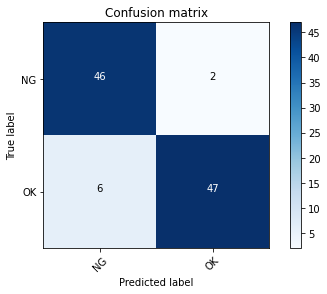

In [57]:
target_names = ['NG','OK']
cnf_matrix = confusion_matrix(y_test,predictions)
plot_confusion_matrix(cnf_matrix, classes=target_names)

In [59]:
import joblib
joblib.dump(model, 'save/svm_model.pkl')

['save/svm_model.pkl']

In [61]:
model = joblib.load('save/svm_model.pkl')
model.predict(X_test)

array(['0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1',
       '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0',
       '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1',
       '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0',
       '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0',
       '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0',
       '1', '1', '1', '1', '1', '0', '0', '0', '1', '1'], dtype=object)

In [51]:
len(model.support_vectors_)
len(X_test)

101

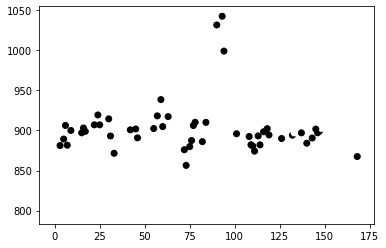

TypeError: Input z must be 2D, not 1D

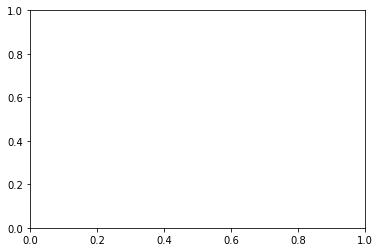

In [52]:
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
def plot_svm_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = x2
    y = y2
    Y, X = np.meshgrid(y, x)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
    P = model.decision_function(X_test)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(range(len(model.support_vectors_)),model.support_vectors_[:, 0], linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X_test.index,X_test, c=y_test.ravel(), cmap='autumn')
plt.show()

ax = plt.gca()
xxxx=model.support_vectors_
#ax.scatter(range(len(xxxx)),model.support_vectors_[:, 0], linewidth=1, facecolors='none')
plot_svm_decision_function(model, ax)


In [ ]:
x1=np.linspace(0,1,25)

In [ ]:
p=model.decision_function(X_test)

In [ ]:
p

In [ ]:
model.support_vectors_

In [ ]:
model.support_vectors_[:, 0]

In [ ]:
X_test